# **Investment Analysis Assignment**

In [130]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Checkpoint 1: Data Cleaning

In [132]:
#Creating Companies dataframe
companies=pd.read_csv("/home/arijit/Documents/UpGrad+IIITB_PGDML/Working_Directory/Assignment/Investment Assignment/companies.csv", encoding="ISO-8859-1")

#Removing the special characters in Permalink and name column.
companies["permalink"] = companies["permalink"].str.encode('ascii','ignore').str.decode('ascii').str.lower()
companies["name"] = companies["name"].str.encode('ascii','ignore').str.decode('ascii').str.lower()

In [16]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [17]:
#Analysing the data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [18]:
companies.shape

(66368, 10)

In [19]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [133]:
#Creating rounds2 dataframe
rounds2=pd.read_csv("/home/arijit/Documents/UpGrad+IIITB_PGDML/Working_Directory/Assignment/Investment Assignment/rounds2.csv", 
                    engine= "python", encoding="ISO-8859-1")
#Removing the special characters in Company Permalink column.
rounds2["company_permalink"]=rounds2["company_permalink"].str.encode('ascii','ignore').str.decode('ascii').str.lower()

In [23]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [6]:
#Analysing the data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [7]:
rounds2.shape

(114949, 6)

In [27]:
#Unique records in rounds dataframe
rounds2["company_permalink"].nunique(dropna=True)

66368

* <span style="color:orange">Question: How many unique companies are present in rounds2?</span>
* <span style="color:green">Answer: 66368</span>

In [29]:
#Unique records in rounds dataframe
companies["permalink"].nunique(dropna=True)

66368

* <span style="color:orange">Question: How many unique companies are present in companies?</span>
* <span style="color:green">Answer: 66368</span>




* <span style="color:orange">Question: In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.</span>
* <span style="color:green">Answer: permalink</span>

In [35]:
#To check if company available in Companies dataframe is not avilable in rounds2 dataframe
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


* <span style="color:orange">Question: Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N</span>
* <span style="color:green">Answer: No</span>

<span style="color:white"> Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.</span>

In [134]:
#Merge companies and rounds2 dataframes to a new dataframe named "master_frame"
master_frame = pd.merge(companies,rounds2, left_on='permalink', right_on='company_permalink', how='inner')

In [135]:
#Check the shape of master_frame DF
master_frame.shape

(114949, 16)

In [44]:
#Check the number of null values in each column of master_frame DF
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [31]:
#Check the percentage of null values in each column of master_frame DF
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

* <span style="color:orange"> Question: How many observations are present in master_frame? </span>
* <span style="color:green"> Answer: There are 114949 rows, 16 columns. We also checked if there are any null values and found 'funding round code' columns with maximum null entries with 72.91% null values.

In [48]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [136]:
#We observe 'funding_round_code' and 'founded_at' columns possess a large amt. of NULL values, i.e.73% amd 18%. 
#It will be better to remove these columns as they aren't useful in the necessary analysis we need to perform.
#Even the company_permalink column can be removed completely.

master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)

# Viewing the remaining NULL values post this initial cleanup 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

In [137]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,nan
2,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.00
114945,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.00
114946,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,01-08-2014,nan
114947,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,18192.00


 **Another thing that we can do is remove the rows for which the 'raised_amount_usd' value is missing.**                                                                            
 <br>
 
 </br>
Without this information, this particular data is almost useless to our analysis.

In [138]:
# removing NaN raised_amount_usd rows
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [60]:
master_frame.isnull().sum()

permalink                     0
name                          1
homepage_url               4332
category_list              1044
status                        0
country_code               5851
state_code                 7604
region                     7048
city                       7045
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
dtype: int64

In [35]:
# Finding percentage of null values after data cleansing
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

At this point we have 6 columns with missing data. Let us refrain from removing any more data as we have the 'raised_amount_usd' info populated for all the remaining rows.

In [139]:
master_frame[master_frame.isnull().sum(axis=1) > 6].shape

(0, 13)

This ensures that there are no rows that have data missing for all the 6 attributes/columns.

In [72]:
# count the number of rows having > 5 missing values
# using len(master_frame.index)
len(master_frame[(master_frame.isnull().sum(axis=1) > 5)].index)

191

In [77]:
# calculate the percentage
round((len(master_frame[(master_frame.isnull().sum(axis=1) > 5)].index)/len(master_frame.index))*100, 2)

0.2

In [140]:
#We can neglect the missing values of homepage_url, state_code, region and city as they do not bring any value 
#for our final analysis.

#lets further remove some of the columns which does not contribute to our current analysis
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

In [37]:
master_frame

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01games technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,zzzzapp wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0
114944,/organization/zzzzapp-com,zzzzapp wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
114945,/organization/zzzzapp-com,zzzzapp wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0
114947,/organization/asys-2,asys,Consumer Electronics|Internet of Things|Teleco...,operating,USA,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,18192.0


In [80]:
#Percentage of NULL values after data cleansing
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Since 'category_list' and 'country_code' still possess some NULL values (1% and 6%). Let us get insights related to these two.

In [81]:
master_frame.category_list.describe()

count             93915
unique            23485
top       Biotechnology
freq               7773
Name: category_list, dtype: object

In [82]:
master_frame.country_code.describe()

count     89108
unique      134
top         USA
freq      62049
Name: country_code, dtype: object

<span style="color:violet"> Performing Data Imputation for error reduction at further stages. </span>

In [141]:
# imputing NaNs by term "undefined" for category_list
master_frame.loc[master_frame.category_list.isnull(), ['category_list']] = "undefined"

In [95]:
master_frame.isnull().sum()

permalink                     0
name                          1
category_list                 0
status                        0
country_code               5851
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
dtype: int64

In [142]:
# imputing NaNs by "N.A." - Not applicable for now
master_frame.loc[master_frame.country_code.isnull(), ['country_code']] = "N.A."

In [40]:
master_frame.isnull().sum()

permalink                  0
name                       1
category_list              0
status                     0
country_code               0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [41]:
# fraction of rows lost
100 - round(100*(len(master_frame.index)/114949), 2)

17.39

We can see that we have lost approximately 17% (17.4%) of the source data after data cleaning.

**Now we can say that we have the data clean and ready!!**

## Checkpoint 2: Funding Type Analysis

This is the first of the three goals of data analysis – investment type analysis.
<br/>
<br/>
The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.
<br/>
<br/>
* Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
* Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.

<br>

</br>
Spark Funds wants to choose one of these four investment types for each potential investment they will make.
<br/>
<br/>
Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.
<br/>
<br/>

<span style="color:violet"> Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)</span>

In [143]:
table = pd.pivot_table(master_frame, index='funding_round_type', values='raised_amount_usd', aggfunc=np.mean)
table

,raised_amount_usd
funding_round_type,
angel,958694.47
convertible_note,1453438.54
debt_financing,17043526.02
equity_crowdfunding,538368.21
grant,4300576.34
non_equity_assistance,411203.05
post_ipo_debt,168704571.82
post_ipo_equity,82182493.87
private_equity,73308593.03


|       Sl.No.      | Questions                                 | Answer               |
| :---------------- | :---------------------------------------: | -------------------: |
| 1                 |  Average funding amount of venture type   | 11748949.13          |
| 2                 |  Average funding amount of angel type     | 958694.47            |
| 3                 |  Average funding amount of seed type      | 719818.00            |
| 4                 |  Average funding amount of private equity type | 73308593.03          |
| 5                 |  Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for them?    | venture              |

* Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [144]:
#Calculating Average investment in Venture,Angel,Seed and Private Equity
funding_type_avg = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean()[['venture','angel','seed','private_equity']].sort_values()
funding_type_avg

funding_round_type
seed               719818.00
angel              958694.47
venture          11748949.13
private_equity   73308593.03
Name: raised_amount_usd, dtype: float64

In [145]:
#Finding Best Investment type suitable for spark fund i.e 5 to 15 million USD
best_investment_type = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean().between(5000000,15000000,inclusive=True)
best_investment_type

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

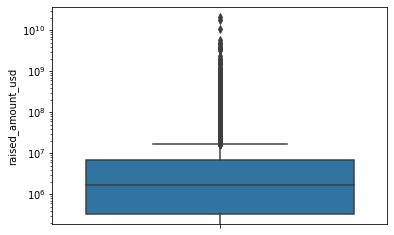

In [111]:
#visualising the diversity of data/values for 'raised_amount_usd' column
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

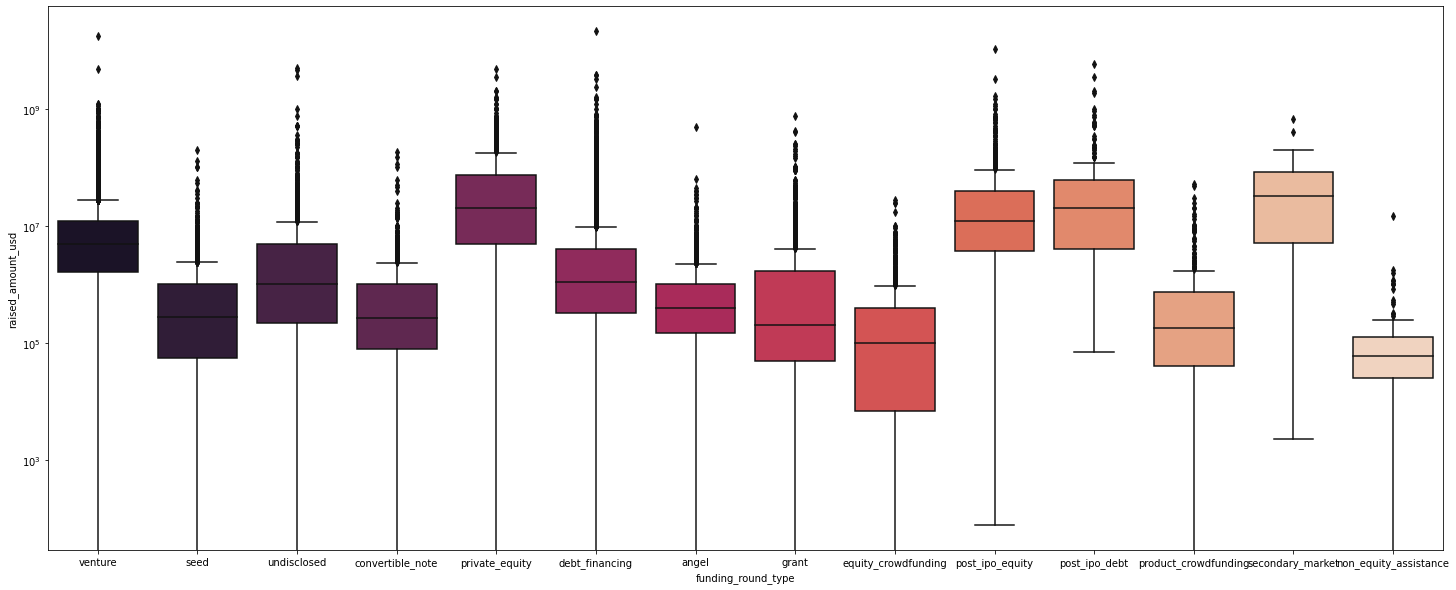

In [112]:
# boxplots showcasing the range of investment amounts across various funding categories
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', palette = "rocket", data=master_frame)
plt.yscale('log')
plt.show()

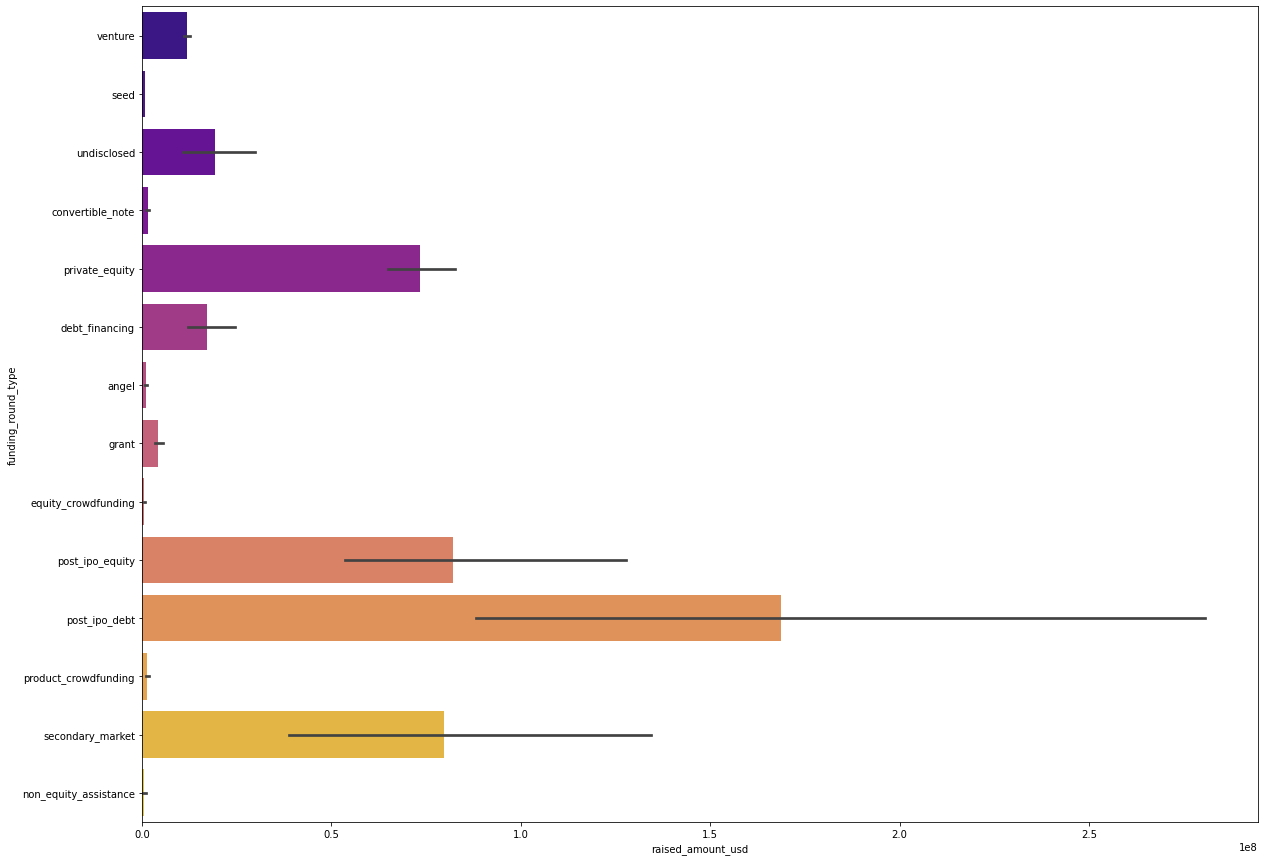

In [113]:
# bar plot with mean(raised_amount_usd) for different funding categories
plt.figure(figsize=(20, 15))
sns.barplot(y='funding_round_type', x='raised_amount_usd', palette = "plasma",data=master_frame)
plt.show()

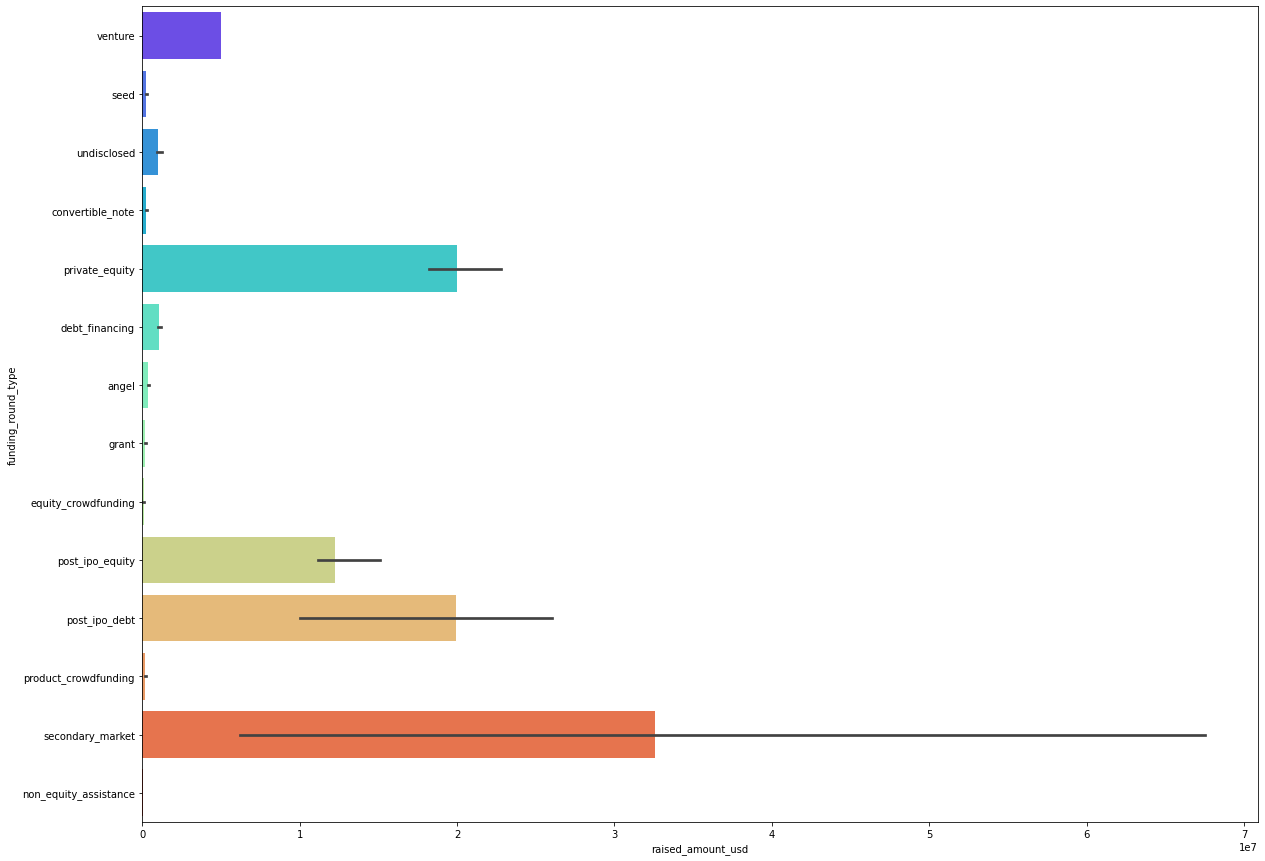

In [114]:
# bar plot with median(raised_amount_usd) for different funding categories
# Plotting categorical variable across the y-axis
plt.figure(figsize=(20, 15))
sns.barplot(x='raised_amount_usd', y="funding_round_type", palette = "rainbow",data=master_frame, estimator=np.median)
plt.show()

<span style="color:violet"> Restricting the master frame to the 4 type of funding rounds that we need to actually focus on as per our objective. </span>

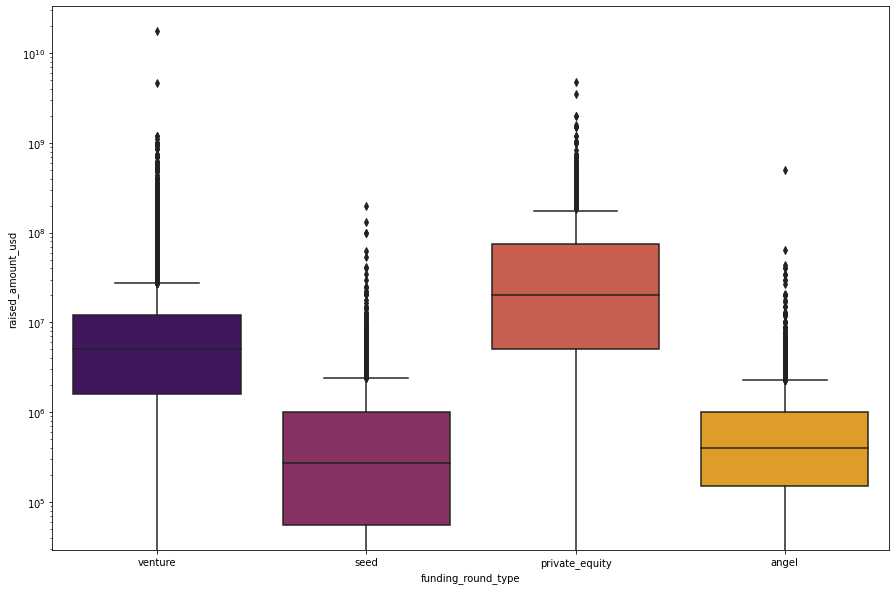

In [115]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

# boxplot of raised_amount_usd across various funding categories
plt.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', palette = "inferno",data=master_frame)
plt.yscale('log')
plt.show()

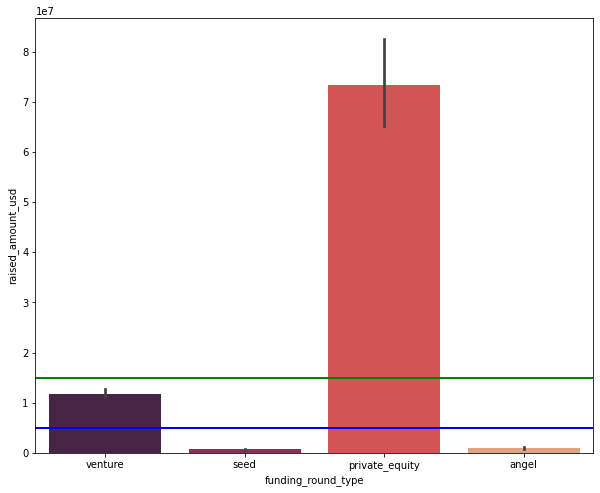

In [116]:
# bar plot with default statistic=mean
plt.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', palette = "rocket", data=master_frame)

#plotting 5million and 15million marker-outlines as per the necessary benchmark which we need to focus on as per 
#our objective that Spark Funds wants to invest between 5 to 15 million USD per investment round

plt.axhline(y=5000000, linewidth=2, color = 'b')
plt.axhline(y=15000000, linewidth=2, color = 'g')
plt.show()

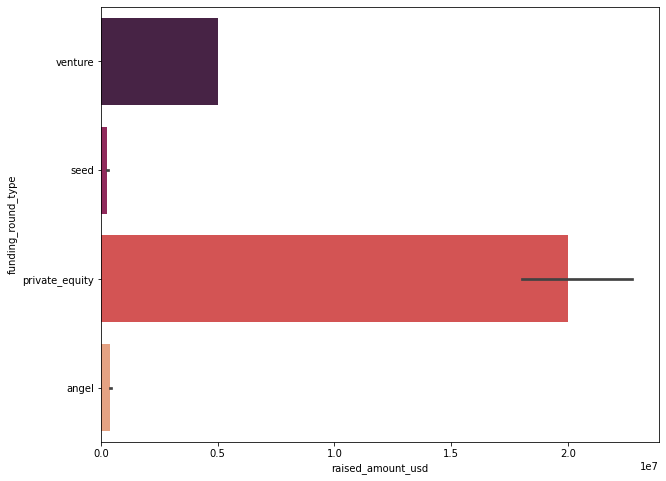

In [117]:
# Plotting median (raised_amount_usd) for the 4 different funding categories.
plt.figure(figsize=(10, 8))
sns.barplot(x='raised_amount_usd', y="funding_round_type", palette = "rocket",data=master_frame, estimator=np.median)
plt.show()

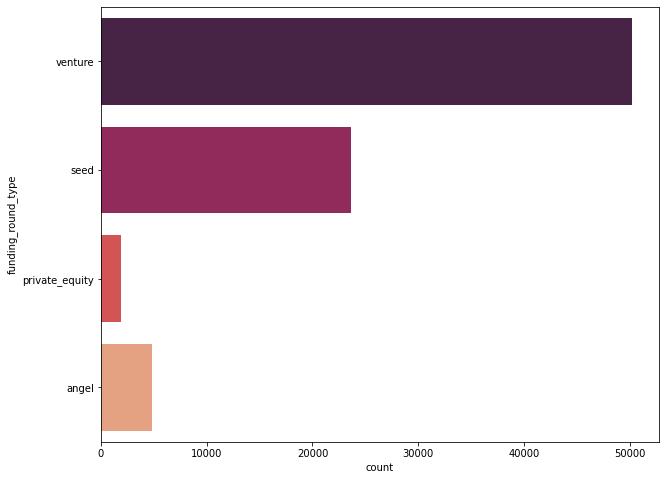

In [118]:
# Plotting total count of the 4 different funding categories across the dataframe
plt.figure(figsize=(10, 8))
sns.countplot(y="funding_round_type", palette = "rocket",data=master_frame)
plt.show()

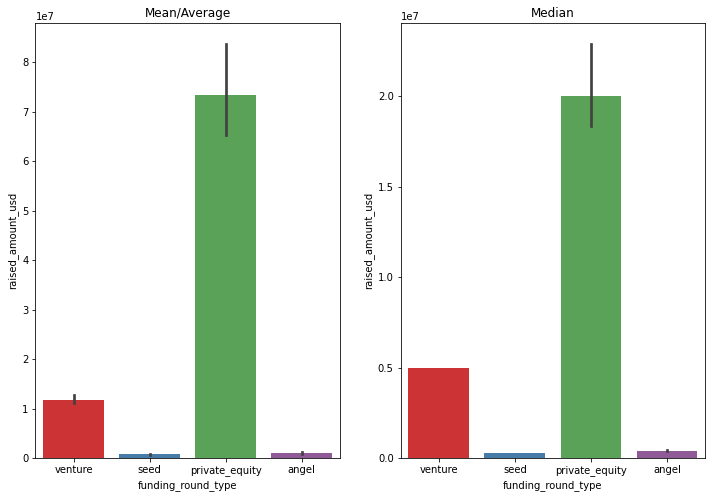

In [119]:
# Creating 2 subplots for mean and median respectively for further analysis

plt.figure(figsize=(12, 8))

# subplot 1: Plotting the mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', palette = "Set1", data=master_frame)
plt.title("Mean/Average")

# subplot 2: Plotting the median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', palette = "Set1",data=master_frame, estimator=np.median)
plt.title("Median")

plt.show()

In [121]:
master_frame['funding_round_type'].value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

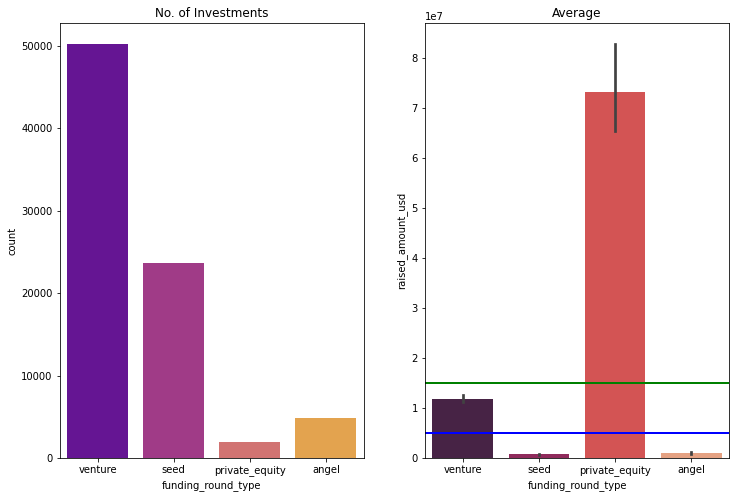

In [122]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", palette = "plasma",data=master_frame)
plt.title("No. of Investments")

plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", palette = "rocket",data=master_frame, estimator=np.mean)
plt.title("Average")

plt.axhline(y=5000000, linewidth=2, color = 'b')
plt.axhline(y=15000000, linewidth=2, color = 'g')
plt.show()

**Thus, from the above plots, we can infer that:**

1. A large no. of them are investing in the venture funding category.
2. Additionally, it also comes in the bracket of 5-15million USD which Spark Funds have set up as their budget.

These 2 points help us come to the conclusion that 'venture' type funding is the best suited category for Spark Funds.

## Checkpoint 3: Country Analysis
<br/>
This is the second goal of analysis — country analysis.

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where **most investments are occurring**.

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named **top9** with the top nine countries (based on the total investment amount each country has received)

**Identify the top three English-speaking countries in the data frame top9**.

* Question : For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

**Results Expected: Table 3.1**

|                                                       |                             |
| :----------------------------                         | --------------------------: |
|Top English speaking country                           |                          USA| 
|Second English speaking country                        |                          GBR|
|Third English speaking country                         |                          IND|



In [146]:
#Creating master frame for venture type only for further analysis
master_frame_venture = master_frame[master_frame.funding_round_type == "venture"]
master_frame_venture

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",Apps|Games|Mobile,operating,N.A.,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00
8,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00
10,/organization/0xdata,h2o.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00
...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,zyraz technology,Biotechnology,closed,MYS,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.00
114934,/organization/zyrra,zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00
114936,/organization/zystor,zystor,Biotechnology,acquired,USA,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.00
114937,/organization/zytoprotec,zytoprotec,Biotechnology,operating,AUT,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.00


In [114]:
master_frame_venture.shape

(39018, 10)

In [148]:
master_frame_venture.country_code.describe()

count     50228
unique       98
top         USA
freq      36139
Name: country_code, dtype: object

<font size=5>As per our next objective:</font>

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

In [149]:
#all the investment amounts values' for the different country codes in descending order.
master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

country_code
USA    422510842796.00
CHN     39835418773.00
N.A.    25506108414.00
GBR     20245627416.00
IND     14391858718.00
CAN      9583332317.00
FRA      7259536732.00
ISR      6907514579.00
DEU      6346959822.00
JPN      3363676611.00
SWE      3254952563.00
NLD      2939403619.00
CHE      2827560264.00
SGP      2793917856.00
ESP      1835831452.00
Name: raised_amount_usd, dtype: float64

In [150]:
#creating a data frame named top9 with the top nine countries 
# Create a new data frame top9 with the list of countries with highest funding
top9 = master_frame_venture[master_frame_venture['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9 = top9.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by = ['raised_amount_usd'],ascending=False)
#top9 = master_frame_venture.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by = ['raised_amount_usd'],ascending=False).head(9)
top9['Rank'] = range(1,10)
top9.set_index(['Rank'],inplace = True)

In [151]:
top9

,country_code,raised_amount_usd
Rank,,
1,USA,422510842796.00
2,CHN,39835418773.00
3,GBR,20245627416.00
4,IND,14391858718.00
5,CAN,9583332317.00
6,FRA,7259536732.00
7,ISR,6907514579.00
8,DEU,6346959822.00
9,JPN,3363676611.00


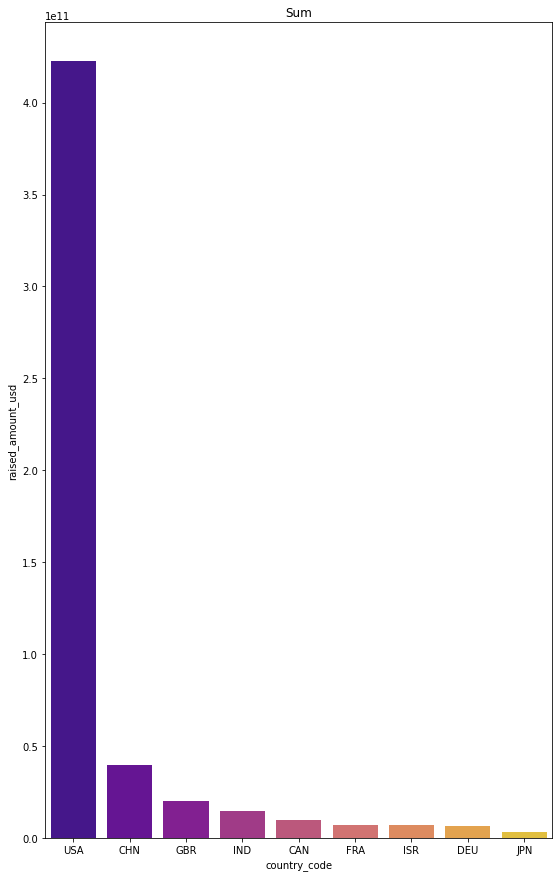

In [150]:
# Plotting the sum across the top 9 country_codes as a part of our objective mentioned below :

# Part of Checkpoint 6: Plots:
# A plot showing the top 9 countries against the total amount of investments of funding type FT.

plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd",palette = "plasma",data=top9, estimator=sum)
plt.title("Sum")
plt.show()

In [152]:
country_official_lang=pd.read_html("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language",header=0)
Country_tab1=country_official_lang[3][["Country","ISO code"]]
Country_tab2=country_official_lang[4][["Country","ISO code"]]
country_tab12=[Country_tab1,Country_tab2]
Country_list_from_wiki=pd.concat(country_tab12).sort_values('ISO code')
Country_list_from_wiki

,Country,ISO code
0,Antigua and Barbuda[citation needed],ATG
0,Australia[citation needed],AUS
5,Burundi[4],BDI
1,The Bahamas[1],BHS
3,Belize[3],BLZ
2,Barbados[2],BRB
4,Botswana[3],BWA
7,Canada,CAN
6,Cameroon[1],CMR
8,Dominica[1],DMA


In [153]:
Country_list_from_wiki.shape

(58, 2)

In [154]:
#Derving top3 countries by joining top9 and Country_list_from_wiki dataframes
pd.options.display.float_format = '{:.2f}'.format
top_3=pd.merge(left=top9, right=Country_list_from_wiki, left_on='country_code',right_on='ISO code',how='inner').head(3)
top_3[['ISO code','raised_amount_usd']]

,ISO code,raised_amount_usd
0,USA,422510842796.00
1,GBR,20245627416.00
2,IND,14391858718.00


In [155]:
#Creating a list to use it later on rather than hard coding country codes
top_3['ISO code'].tolist()

['USA', 'GBR', 'IND']

<span style="color:green">Answers to the questions:<span/>

1. Top English speaking country = USA
2. Second English speaking country = GBR
3. Third English speaking country = IND

In [106]:
#Check top 9 frame should have 9 unique countries
len(top9.country_code.unique())

9

In [107]:
#Check the shape of master_frame_venture DF
master_frame_venture.shape

(50228, 9)

## Checkpoint 4: Sector Analysis 1
<br/>
This is the third goal of analysis — sector analysis.

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

Extract the primary sector of each category list from the category_list column

Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

**Expected Results:** Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).



In [156]:
#Adding new column Primary_Sector to the master_frame_venture dataframe
#Picking only first value in case if category list have multiple values seprated with piple(|)
master_frame_venture=master_frame_venture[master_frame_venture.country_code.isin(top_3['ISO code'].tolist())]
master_frame_venture['Primary_Sector']=master_frame_venture.category_list.str.split('|').str[0].str.lower()

In [157]:
#Getting the shape of dataframe
master_frame_venture.shape

(39018, 10)

In [124]:
master_frame_venture

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media
10,/organization/0xdata,h2o.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,analytics
11,/organization/0xdata,h2o.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,analytics
12,/organization/0xdata,h2o.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,analytics
22,/organization/1-mainstream,1 mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,apps
...,...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,zyomyx,Biotechnology,operating,USA,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.00,biotechnology
114922,/organization/zyomyx-inc,zyomyx,Biotechnology,operating,USA,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.00,biotechnology
114923,/organization/zyomyx-inc,zyomyx,Biotechnology,operating,USA,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.00,biotechnology
114934,/organization/zyrra,zyrra,E-Commerce,operating,USA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00,e-commerce


In [158]:
#Creating mapping dataframe and mapping each primary sector to one of the eight main sectors
mapping=pd.read_csv('/home/arijit/Documents/UpGrad+IIITB_PGDML/Working_Directory/Assignment/Investment Assignment/mapping.csv', encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [186]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


Using mapping.info(), we observe that there are 7 main categories excluding Others and Blank data

 After visually examining the values, we can see that 'na' is misspelt as '0' .
 
 <font size="2">For e.g : analytics, alternative, management have been misspelt as a0lytics, alter0tive, ma0gement etc.</font>

In [159]:
mapping['category_list']= mapping['category_list'].replace({'0':'na','2.na':'2.0'}, regex=True).str.lower()
melted=pd.melt(mapping, id_vars=["category_list"], var_name="Main_Sector",value_name="flag")
mapping_tag=melted[melted["flag"] == 1][['category_list','Main_Sector']]
mapping_tag

,category_list,Main_Sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports
...,...,...
6121,social recruiting,"Social, Finance, Analytics, Advertising"
6122,social television,"Social, Finance, Analytics, Advertising"
6123,social travel,"Social, Finance, Analytics, Advertising"
6134,stock exchanges,"Social, Finance, Analytics, Advertising"


In [126]:
#Check the columns available in dataframe
master_frame_venture.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'Primary_Sector'],
      dtype='object')

In [160]:
Main_Sector_Venture=pd.merge(master_frame_venture,mapping_tag,left_on='Primary_Sector',right_on='category_list',how='inner')
Main_Sector_Venture

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,Primary_Sector,category_list_y,Main_Sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,media,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,media,media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,media,media,Entertainment
4,/organization/all-def-digital,all def digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,media,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
38783,/organization/yapta,yapta,Tracking|Transportation|Travel,operating,USA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,22-07-2013,4220000.00,tracking,tracking,Others
38784,/organization/yapta,yapta,Tracking|Transportation|Travel,operating,USA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.00,tracking,tracking,Others
38785,/organization/yapta,yapta,Tracking|Transportation|Travel,operating,USA,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.00,tracking,tracking,Others
38786,/organization/ziftit,ziftit,Gift Registries|Shopping,closed,USA,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.00,gift registries,gift registries,Others


In [161]:
Main_Sector_Venture.groupby('Main_Sector').Main_Sector.count()

Main_Sector
Automotive & Sports                         580
Cleantech / Semiconductors                 8492
Entertainment                              2006
Health                                     3429
Manufacturing                              2630
News, Search and Messaging                 4727
Others                                     9110
Social, Finance, Analytics, Advertising    7814
Name: Main_Sector, dtype: int64

In [162]:
Main_Sector_Venture.shape

(38788, 12)

## Checkpoint 5: Sector Analysis 2
<br/>
Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight main sectors.

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.

Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

**1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:**

* All the columns of the master_frame along with the primary sector and the main sector

* The total number (or count) of investments for each main sector in a separate column

* The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.

**Result Expected**

1. Three data frames D1, D2 and D3

2. Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend Spark Funds to invest in? Present your conclusions in the presentation. The conclusions are subjective (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors where most investments are occurring.

<br>
</br>
<font size="2">Table 5.1 : Sector-wise Investment Analysis</font>

|                                        | Country 1        | Country 2        | Country 3              |
|----------------------------------------|------------------|------------------|------------------------|
| 1. Total number of Investments (count) | 12149            | 628              | 330                    |
| 2. Total amount of investment (USD)    | 108,521,860,586  | 5,436,843,539    | 2,976,543,602          |
| 3. Top sector (based on count)         | Others           | Others           | Others                 |
| 4. Second-best sector (based on count) | Social, Finance, Analytics, Advertising | Social, Finance, Analytics, Advertising | Social, Finance, Analytics, Advertising |
| 5. Third-best sector (based on count)  | Cleantech / Semiconductors | Cleantech / Semiconductors | News, Search and Messaging |
| 6. Investments in top sector           | 2950             | 147              | 110                    |
| 7. Investments in second-best sector   | 2714             | 133              | 60                     |
| 8. Investments in third-best sector    | 2350             | 130              | 52                     |
| 9. Highest investment in top sector    | Virtustream      | Electric Cloud   | FirstCry.com           |
| 10. Highest investment in second-best sector | SST Inc. (Formerly ShotSpotter) | Celltick Technologies | Manthan Systems         |


In [163]:
# Creating D1, D2 and D3 Datarames as per the mentioned requirements in Probelm Description.

D1=Main_Sector_Venture[(Main_Sector_Venture['country_code'] == top_3['ISO code'][0]) & (Main_Sector_Venture['raised_amount_usd'] >= 5000000) & (Main_Sector_Venture['raised_amount_usd'] <= 15000000)]
D2=Main_Sector_Venture[(Main_Sector_Venture['country_code'] == top_3['ISO code'][1]) & (Main_Sector_Venture['raised_amount_usd'] >= 5000000) & (Main_Sector_Venture['raised_amount_usd'] <= 15000000)]
D3=Main_Sector_Venture[(Main_Sector_Venture['country_code'] == top_3['ISO code'][2]) & (Main_Sector_Venture['raised_amount_usd'] >= 5000000) & (Main_Sector_Venture['raised_amount_usd'] <= 15000000)]


In [164]:
pd.options.display.float_format = '{:.5f}'.format
D1=D1.assign(Main_Sector_Investment_sum = lambda x: D1.groupby('Main_Sector')['raised_amount_usd'].transform('sum'),
            Main_Sector_Investment_count = lambda x: D1.groupby('Main_Sector')['raised_amount_usd'].transform('count'))


In [165]:
D2=D2.assign(Main_Sector_Investment_sum = lambda x: D2.groupby('Main_Sector')['raised_amount_usd'].transform('sum'),
            Main_Sector_Investment_count = lambda x: D2.groupby('Main_Sector')['raised_amount_usd'].transform('count'))

In [166]:
D3=D3.assign(Main_Sector_Investment_sum = lambda x: D3.groupby('Main_Sector')['raised_amount_usd'].transform('sum'),
            Main_Sector_Investment_count = lambda x: D3.groupby('Main_Sector')['raised_amount_usd'].transform('count'))

In [168]:
#Total amount of investment (USD) w.r.t Country 1: USA, Country 2: GBR, Country 3: IND
investment_sum=[D1['Main_Sector_Investment_sum'].unique().sum(),D2['Main_Sector_Investment_sum'].unique().sum(),D3['Main_Sector_Investment_sum'].unique().sum()]
Investment_sum_info=pd.DataFrame(investment_sum, columns=['Main_Sector_Investment_Sum'], index=top_3['ISO code'].tolist())
Investment_sum_info

,Main_Sector_Investment_Sum
USA,107757097294.00000
GBR,5379078691.00000
IND,2949543602.00000


In [170]:
#Total number of Investments (count) w.r.t Country 1: USA, Country 2: GBR, Country 3: IND
pd.options.display.float_format = '{:,.0f}'.format
investment_count=[D1.Main_Sector_Investment_count.unique().sum(),D2.Main_Sector_Investment_count.unique().sum(),D3.Main_Sector_Investment_count.unique().sum()]
Investment_count_info=pd.DataFrame(investment_count,columns=['Main_Sector_Investment_count'],index=top_3['ISO code'].tolist())
Investment_count_info

,Main_Sector_Investment_count
USA,12063
GBR,621
IND,328


In [171]:
#Country 1: USA Master_Sector values for Q3,Q4 and Q5 respectively and 
#           Investment count values for Q6, Q7, Q8 respectively
D1_top_sector=D1.groupby(['Main_Sector']).agg({'raised_amount_usd':"count"}).sort_values('raised_amount_usd', ascending=False).head(3)
D1_top_sector.insert(1,"Ranking",['1','2','3'],False)
D1_top_sector.rename(columns={'raised_amount_usd':'investment_count'},inplace=True)
D1_top_sector

,investment_count,Ranking
Main_Sector,,
Others,2950,1
"Social, Finance, Analytics, Advertising",2714,2
Cleantech / Semiconductors,2350,3


In [172]:
#Country 2: GBR Master_Sector values for Q3,Q4 and Q5 respectively and 
#           Investment count values for Q6, Q7, Q8 respectively
D2_top_sector=D2.groupby(['Main_Sector']).agg({'raised_amount_usd':"count"}).sort_values('raised_amount_usd', ascending=False).head(3)
D2_top_sector.insert(1,"Ranking",['1','2','3'],False)
D2_top_sector.rename(columns={'raised_amount_usd':'investment_count'},inplace=True)
D2_top_sector

,investment_count,Ranking
Main_Sector,,
Others,147,1
"Social, Finance, Analytics, Advertising",133,2
Cleantech / Semiconductors,130,3


In [173]:
#Country 3: IND Master_Sector values for Q3,Q4 and Q5 respectively and 
#           Investment count values for Q6, Q7, Q8 respectively
D3_top_sector=D3.groupby(['Main_Sector']).agg({'raised_amount_usd':"count"}).sort_values('raised_amount_usd', ascending=False).head(3)
D3_top_sector.insert(1,"Ranking",['1','2','3'],False)
D3_top_sector.rename(columns={'raised_amount_usd':'investment_count'},inplace=True)
D3_top_sector

,investment_count,Ranking
Main_Sector,,
Others,110,1
"Social, Finance, Analytics, Advertising",60,2
"News, Search and Messaging",52,3


In [175]:
#For the top sector count-wise (point 3), which company received the highest investment?
top_sector=[D1[D1['Main_Sector'] == D1_top_sector.index.tolist()[0]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1),
            D2[D2['Main_Sector'] == D2_top_sector.index.tolist()[0]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1),
            D3[D3['Main_Sector'] == D3_top_sector.index.tolist()[0]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1)]
top_sector_final=pd.concat(top_sector)
top_sector_investment_companies=top_sector_final.set_index('permalink')
top_sector_investment_companies.insert(1, "Country",top_3['ISO code'].tolist())
top_sector_investment_companies

,name,Country,raised_amount_usd
permalink,,,
/organization/virtustream,virtustream,USA,"64,300,000"
/organization/electric-cloud,electric cloud,GBR,"37,000,000"
/organization/firstcry-com,firstcry.com,IND,"39,000,000"


In [176]:
#For the second-best sector count-wise (point 4), which company received the highest investment?
second_top_sector=[D1[D1['Main_Sector'] == D1_top_sector.index.tolist()[1]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1),
            D2[D2['Main_Sector'] == D2_top_sector.index.tolist()[1]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1),
            D3[D3['Main_Sector'] == D3_top_sector.index.tolist()[1]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1)]
second_top_sector_final=pd.concat(second_top_sector)
second_best_sector_investment_companies=second_top_sector_final.set_index('permalink')
second_best_sector_investment_companies.insert(0, "Country",top_3['ISO code'].tolist())
second_best_sector_investment_companies

,Country,name,raised_amount_usd
permalink,,,
/organization/shotspotter,USA,sst inc. (formerly shotspotter),"67,933,006"
/organization/celltick-technologies,GBR,celltick technologies,"37,500,000"
/organization/manthan-systems,IND,manthan systems,"50,700,000"


## Checkpoint 6: Plots
<br/>
As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.
<br/>
<br/>

**Expected Result:** The three plots.

<br/>

**Plot 1 : A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds**

Total investment in all fund types 990125085135.0
Fraction of total investment in Seed Fund 0.017159310915431956
Fraction of total investment in Venture Fund 0.596011782486592
Fraction of total investment in Private Equity Fund 0.14334091544165753
Fraction of total investment in other funds 0.24348799115631847
funding_round_type
seed                719,818
venture          11,748,949
private_equity   73,308,593
Name: raised_amount_usd, dtype: float64


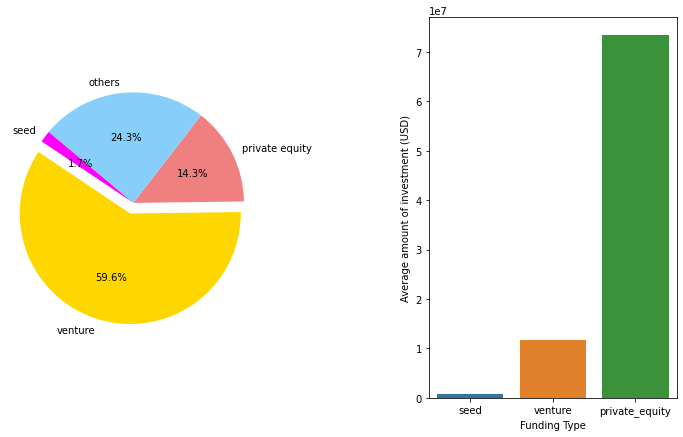

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To find the fraction of investment in each fund type, we will divide the total investment in that fund type by the total investment in all fund types
total_investment_all = master_frame['raised_amount_usd'].sum()
print('Total investment in all fund types %s' % total_investment_all)

# Compute the total investment in seed fund
total_seed = master_frame[master_frame.funding_round_type == 'seed']['raised_amount_usd'].sum()
seed_fraction = total_seed/total_investment_all
print('Fraction of total investment in Seed Fund %s' % seed_fraction)

# Compute the total investment in venture fund
total_venture = master_frame[master_frame.funding_round_type == 'venture']['raised_amount_usd'].sum()
venture_fraction = total_venture/total_investment_all
print('Fraction of total investment in Venture Fund %s' % venture_fraction)

# Compute the total investment in private equity
total_pvt_eq = master_frame[master_frame.funding_round_type == 'private_equity']['raised_amount_usd'].sum()
pvt_eq_fraction = total_pvt_eq/total_investment_all
print('Fraction of total investment in Private Equity Fund %s' % pvt_eq_fraction)

# Compute the total investment in all the remaining fund types
other_funds_fraction = 1 - (seed_fraction + venture_fraction + pvt_eq_fraction)
print('Fraction of total investment in other funds %s' % other_funds_fraction)

# Create the subplots - 1 row, 2 columns
fig1, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.7)
# Adjust the height and width for aesthetics 
fig1.set_figheight(7)
fig1.set_figwidth(12)

# set the labels for the pie chart
labels = ['seed', 'venture', 'private equity', 'others']
# set the pie chart fractions
sizes = [seed_fraction, venture_fraction, pvt_eq_fraction, other_funds_fraction]
# set the pie chart colours
colors = ['magenta', 'gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)
# Plot it on the first subplot
axes[0].pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].axis('equal')

# Next, we will plot the bar chart indicating the average amount of investment of each fund type
# We will group the data by fund types and for each fund type we will find their average investment
grp_means = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
grp_means = grp_means[['seed','venture','private_equity']]
print(grp_means)
# plot the bar chart on the second subplot
ax = sns.barplot(grp_means.index,grp_means.values, ax=axes[1])
# set the x-axis and y-axis labels
ax.set(xlabel = 'Funding Type', ylabel = 'Average amount of investment (USD)')
plt.show()

**<font size="4">Plot 2 : A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.</font>**

Text(0.5, 1.0, 'Top 9 Countires')

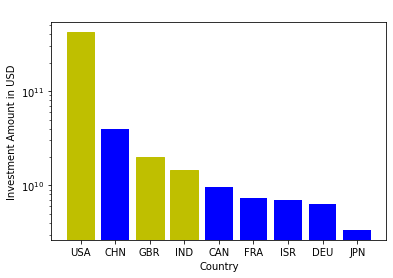

In [179]:
top9_plot=top9.reset_index()
plot_data2=plt.bar(top9_plot['country_code'],top9_plot['raised_amount_usd'], color='blue')

for i in top_3['ISO code'].tolist():
    plot_data2[top9_plot['country_code'].tolist().index(i)].set_color('y')
plt.yscale('log')
plt.xlabel("Country")
plt.ylabel("Investment Amount in USD")
plt.title("Top 9 Countires",color='white')

**Plot 3 : A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).**

Text(0.5, 1.0, 'No. of Investments in top 3 sectors of top 3 countries for Venture FT')

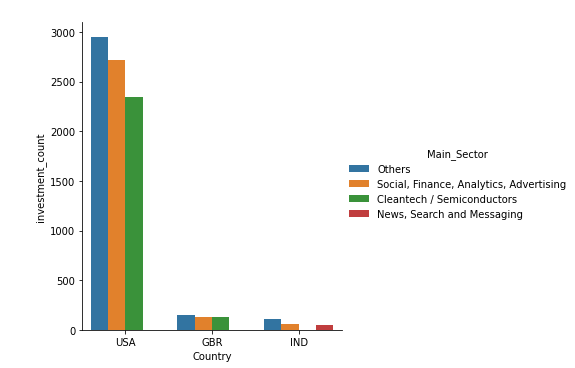

In [181]:
D1_top_sector['Country']=top_3['ISO code'][0]
D2_top_sector['Country']=top_3['ISO code'][1]
D3_top_sector['Country']=top_3['ISO code'][2]

frame=[D1_top_sector,D2_top_sector,D3_top_sector]
plot_data=pd.concat(frame)
plot_data3=plot_data.reset_index()
plot_data3

sns.catplot(x='Country', y='investment_count', hue='Main_Sector', data=plot_data3, kind='bar')
plt.title("No. of Investments in top 3 sectors of top 3 countries for Venture FT",color='white')
